In [6]:
!pip install -e ../src

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/kitamura/work/DeepLearning/mlops/src
     |████████████████████████████████| 122 kB 517 kB/s eta 0:00:01
     |████████████████████████████████| 112 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 1.5 MB/s eta 0:00:01
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=142054 sha256=a15f913e181f4dc9008abfa8498b57486d4149d98253dba7827cd89fb895b52a
  Stored in directory: /home/kitamura/.cache/pip/wheels/a8/04/35/9449686f1c26ff16f6224dc942e108329f3782185802ec6b93
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=45919 sha256=0e5dbef7ff9f912553d877e8816d916ee435272b56373406095afb5c4c425017
  Stored in directory: /home/kitamura/.cache/pip/wheels/e5/9d/ad/2ee53cf262cba1ffd8afe1487eef788ea3f260b7e6232a80fc
Successfully built antlr4-python3-runtime PyYAML
  Attempting uninstall: mlops
    F

In [1]:
import os 

from hydra.experimental import initialize, compose
import matplotlib.pyplot as plt
import numpy as np

import mlops
import mython

In [2]:
project_name = "test_v0"
result_dir = os.path.join("..", "experiments", project_name)
with initialize(config_path=result_dir):
    cfg = compose(config_name="config.yaml")
    
model, train_ds, val_ds = mython.debug.run_debug(
    lambda: mlops.train.train(cfg)
)

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
resnet50 (Model)             multiple                  23587712  
_________________________________________________________________
sequential (Sequential)      (None, 6)                 12294     
Total params: 23,600,006
Trainable params: 23,546,886
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
history = model.fit(train_ds,
                    epochs=cfg["train"]["epochs"],
                    validation_data=val_ds,
                    steps_per_epoch=cfg["train"]["steps_per_epoch"],
                    validation_steps=cfg["train"]["validation_steps"])

Epoch 1/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.8157 - accuracy: 0.6309 - val_loss: 1.0103 - val_accuracy: 0.5918
Epoch 2/100
1000/1000 [==============================] - 42s 42ms/step - loss: 0.7022 - accuracy: 0.6485 - val_loss: 1.0191 - val_accuracy: 0.6056
Epoch 3/100
 395/1000 [==========>...................] - ETA: 23s - loss: 0.6832 - accuracy: 0.6519

In [10]:
model.input

<tf.Tensor 'input_1:0' shape=(None, 64, 64, 3) dtype=float32>

In [3]:
imgs, labels = mython.debug.run_debug(
    lambda: next(iter(train_ds))
)

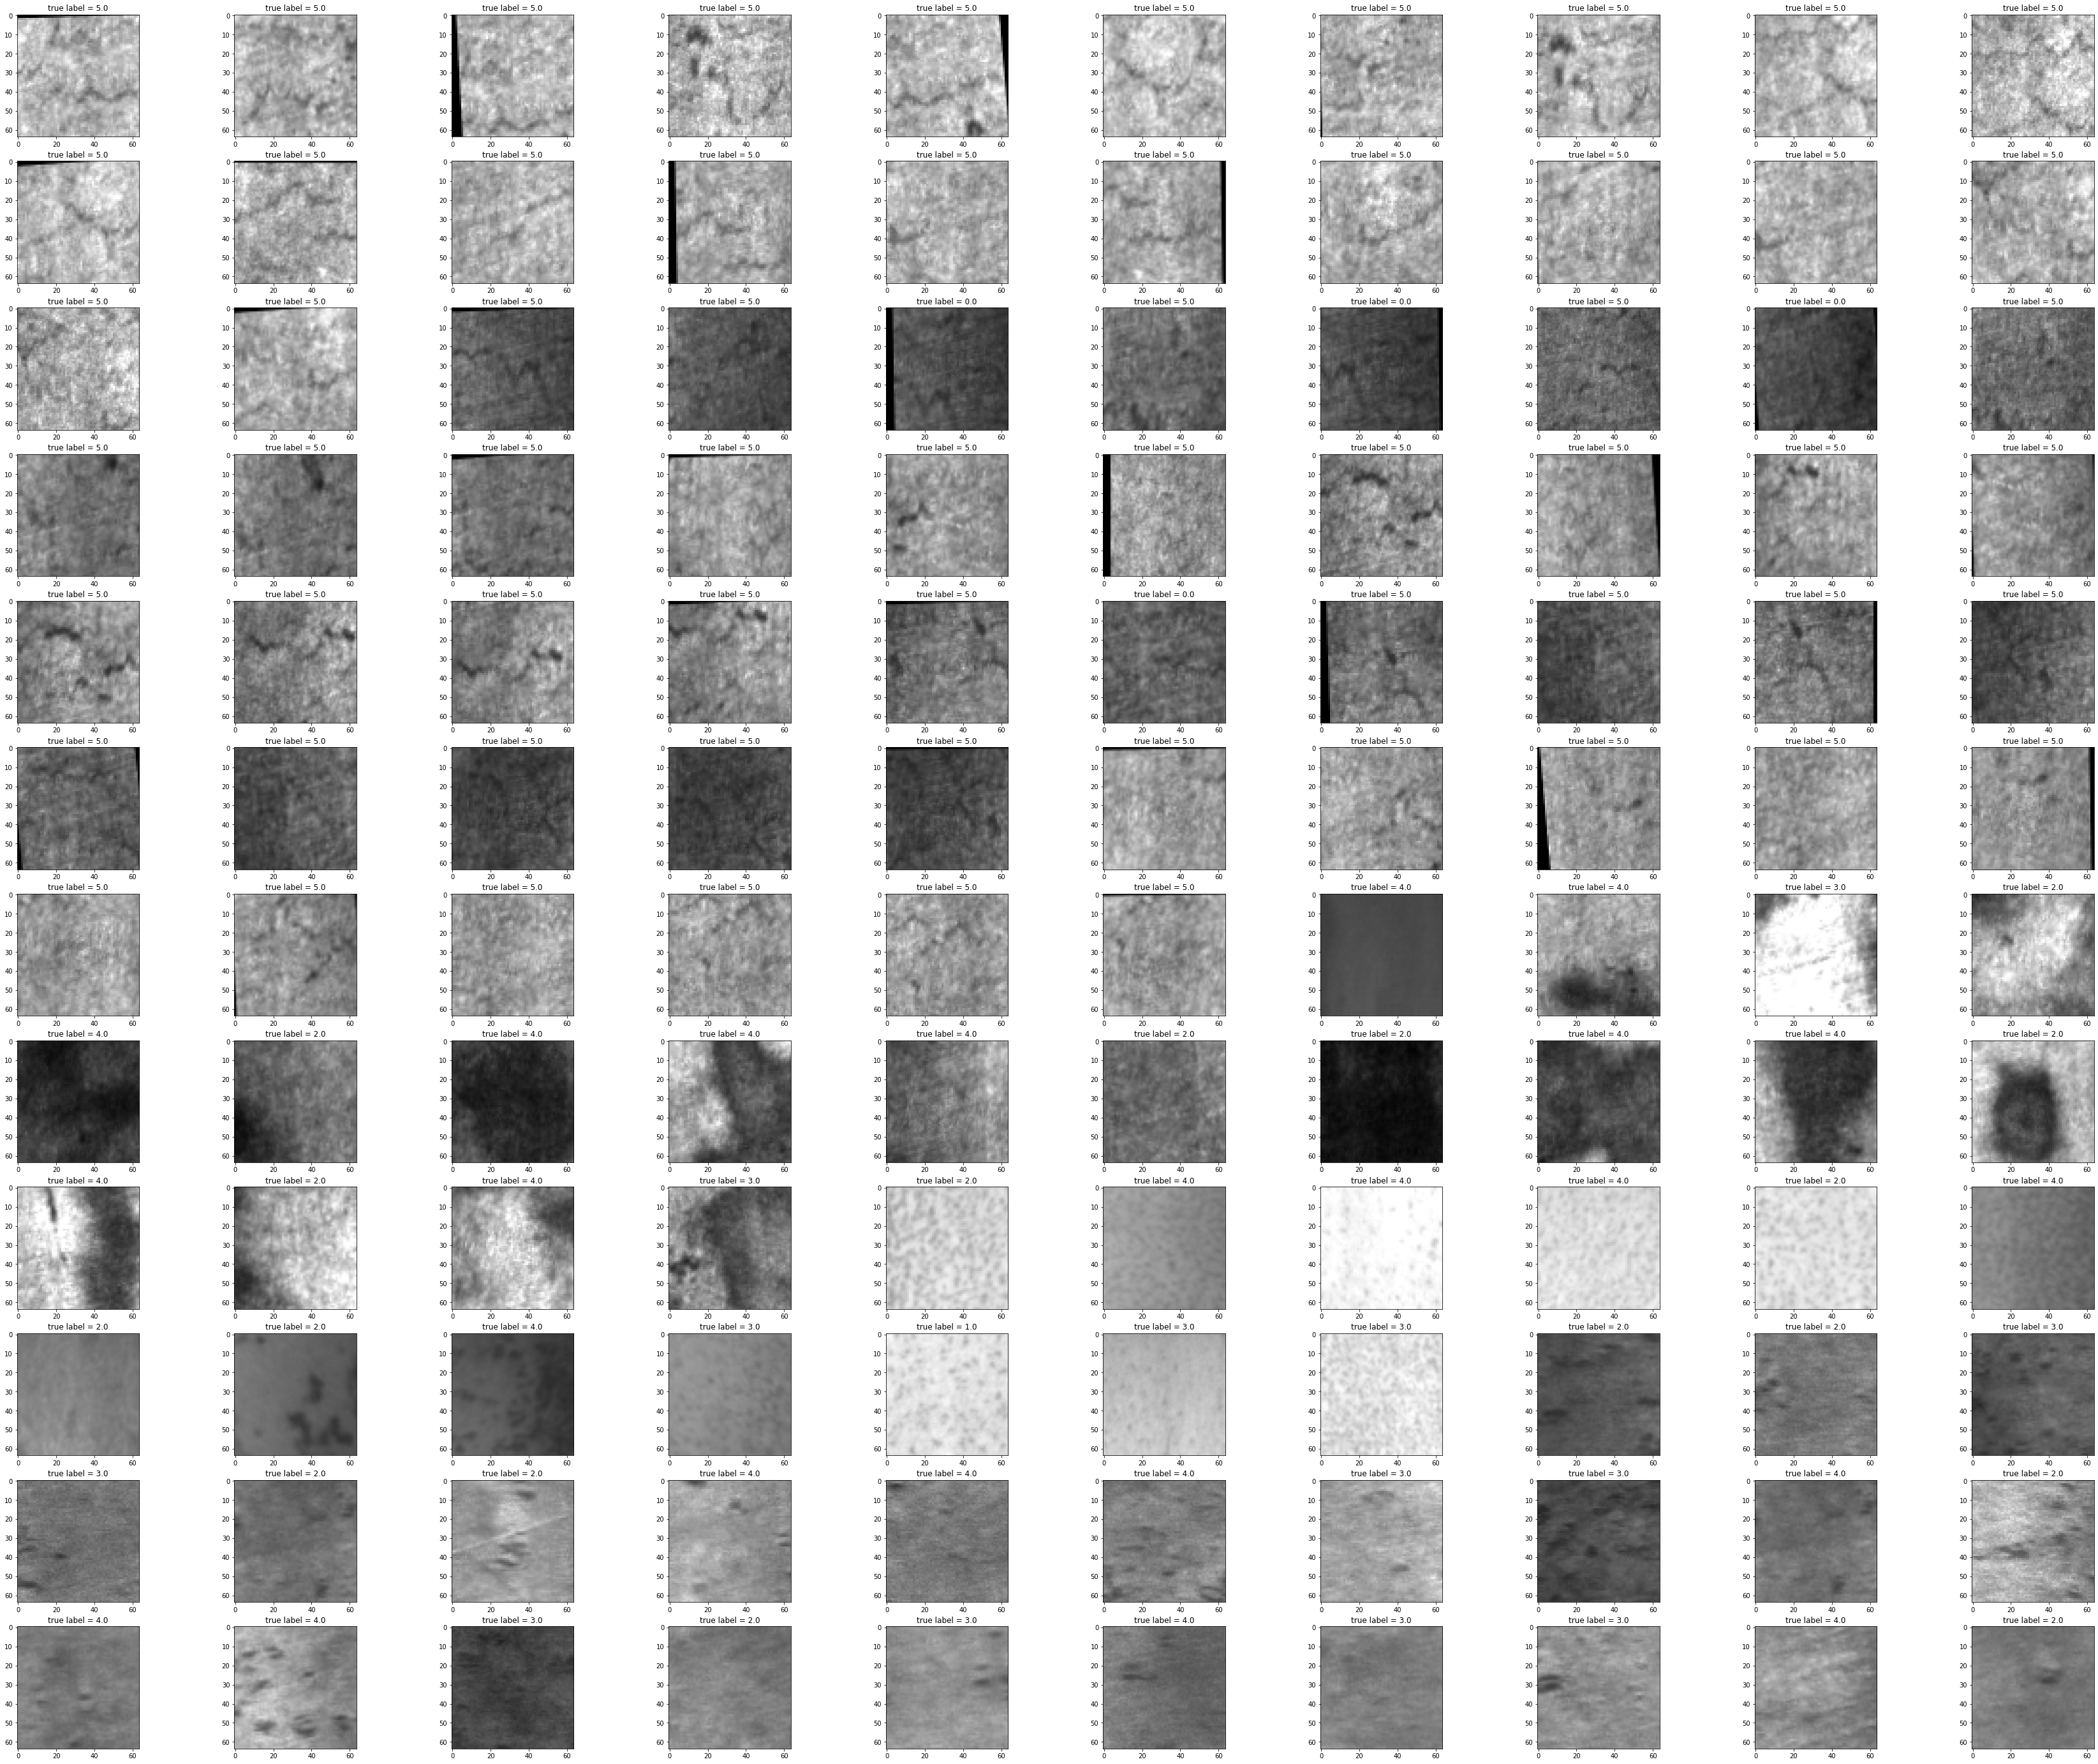

In [5]:
rows, cols = 12, 10
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12 * 5, 10 * 5))
for row in range(rows):
    for col in range(cols):
        idx = row * cols + col
        axes[row][col].imshow(imgs[idx][:, :, ::-1].numpy().astype(np.uint8))
        axes[row][col].set_title("true label = {}".format(labels[idx]))

In [5]:
import random

random.uniform(1.0, 1.0)

1.0